In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [2]:
df = pd.read_excel("Merged Dataset.xlsx")
df.head(2)

,Price/Rent (Euros),Zip code,Arrondissement,Area (m²),Rooms,Bedrooms,Bathroom,Type
0,589999.0,75018.0,18.0,39.0,3.0,1.0,1.0,Housing
1,585000.0,75004.0,4.0,41.0,2.0,1.0,1.0,Housing


In [3]:
df["Type"].unique()

array(['Housing', 'Monthly Rent'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price/Rent (Euros)  4689 non-null   float64
 1   Zip code            4477 non-null   float64
 2   Arrondissement      4477 non-null   float64
 3   Area (m²)           4689 non-null   float64
 4   Rooms               2743 non-null   float64
 5   Bedrooms            3606 non-null   float64
 6   Bathroom            1660 non-null   float64
 7   Type                4689 non-null   object 
dtypes: float64(7), object(1)
memory usage: 293.2+ KB


In [5]:
df1 = df.dropna(subset=['Zip code'])

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4477 entries, 0 to 4688
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price/Rent (Euros)  4477 non-null   float64
 1   Zip code            4477 non-null   float64
 2   Arrondissement      4477 non-null   float64
 3   Area (m²)           4477 non-null   float64
 4   Rooms               2621 non-null   float64
 5   Bedrooms            3394 non-null   float64
 6   Bathroom            1538 non-null   float64
 7   Type                4477 non-null   object 
dtypes: float64(7), object(1)
memory usage: 314.8+ KB


In [7]:
df1['Zip code'] = df1['Zip code'].astype(str)
df1['Arrondissement'] = df1['Arrondissement'].astype(int)


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4477 entries, 0 to 4688
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price/Rent (Euros)  4477 non-null   float64
 1   Zip code            4477 non-null   object 
 2   Arrondissement      4477 non-null   int32  
 3   Area (m²)           4477 non-null   float64
 4   Rooms               2621 non-null   float64
 5   Bedrooms            3394 non-null   float64
 6   Bathroom            1538 non-null   float64
 7   Type                4477 non-null   object 
dtypes: float64(5), int32(1), object(2)
memory usage: 297.3+ KB


In [9]:
df1["Price/Sqm"] = df1["Price/Rent (Euros)"]/df1["Area (m²)"]

In [10]:
df1

,Price/Rent (Euros),Zip code,Arrondissement,Area (m²),Rooms,Bedrooms,Bathroom,Type,Price/Sqm
0,589999.0,75018.0,18,39.0,3.0,1.0,1.0,Housing,15128.179487
1,585000.0,75004.0,4,41.0,2.0,1.0,1.0,Housing,14268.292683
2,580000.0,75006.0,6,37.0,4.0,1.0,2.0,Housing,15675.675676
3,580000.0,75008.0,8,45.0,2.0,1.0,2.0,Housing,12888.888889
4,560000.0,75006.0,6,28.0,4.0,1.0,2.0,Housing,20000.000000
...,...,...,...,...,...,...,...,...,...
4684,1850.0,75020.0,20,27.0,1.0,NaN,NaN,Monthly Rent,68.518519
4685,4000.0,75020.0,20,36.0,1.0,NaN,NaN,Monthly Rent,111.111111
4686,1990.0,75020.0,20,51.0,2.0,NaN,NaN,Monthly Rent,39.019608
4687,2200.0,75020.0,20,28.0,1.0,NaN,NaN,Monthly Rent,78.571429


In [11]:
# Mapping dictionary
arrondissement_names = {
    1: 'Louvre', 2: 'Bourse', 3: 'Temple', 4: 'Hôtel-de-Ville', 5: 'Panthéon', 6: 'Luxembourg', 7: 'Palais-Bourbon',
    8: 'Élysée', 9: 'Opéra', 10: 'Entrepôt', 11: 'Popincourt', 12: 'Reuilly', 13: 'Gobelins', 14: 'Observatoire',
    15: 'Vaugirard', 16: 'Passy', 17: 'Batignolles-Monceau', 18: 'Butte-Montmartre', 19: 'Buttes-Chaumont', 20: 'Ménilmontant',
    92:  'Hauts-de-Seine', 93: 'Seine-Saint-Denis', 94: 'Val-de-Marne'}

# Map the arrondissement numbers to names
df1['Arrondissement_Name'] = df1['Arrondissement'].map(arrondissement_names)

In [12]:
df1["Price/Sqm"] = round(df1["Price/Sqm"], 2)

In [13]:
df_sale = df1[df1["Type"]=="Housing"]

## Percentile Analysis

In [14]:
percentile_ranges = [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]

# Creating specific percentile ranges with labels
labels = ['0-10th', '10-20th', '20-30th', '30-40th', '40-50th', '50-60th', '60-70th', '70-80th', '80-90th', '90-100th']
df_sale['Percentile Range (Price/Sqm)'] = pd.qcut(df_sale['Price/Sqm'], q=percentile_ranges, labels=labels)

# Calculate boundaries for the new ranges
boundaries = df_sale.groupby('Percentile Range (Price/Sqm)')['Price/Sqm'].agg([min, max])

# Map value ranges
value_range_mapping = boundaries.apply(lambda row: f"{row['min']} - {row['max']}", axis=1).to_dict()
df_sale['Price/Sqm ranges based on Percentile ranges (in Euros)'] = df_sale['Percentile Range (Price/Sqm)'].map(value_range_mapping)


In [15]:
df_sale.describe()

,Price/Rent (Euros),Arrondissement,Area (m²),Rooms,Bedrooms,Bathroom,Price/Sqm
count,1.053000e+03,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,2.249387e+06,10.511871,129.832028,4.634378,2.511871,2.414055,17618.711918
std,1.237539e+06,5.215061,60.330282,1.323319,1.031399,1.333066,5862.300010
min,3.290000e+05,1.000000,21.000000,1.000000,1.000000,0.000000,3428.570000
25%,1.295000e+06,6.000000,83.000000,4.000000,2.000000,1.000000,13277.300000
50%,1.899999e+06,9.000000,126.000000,5.000000,3.000000,2.000000,16764.710000
75%,2.827848e+06,16.000000,166.000000,5.000000,3.000000,3.000000,20328.950000
max,5.949999e+06,20.000000,327.000000,10.000000,5.000000,6.000000,48117.150000


In [16]:
# Define the bin edges
bin_edges = range(0, int(df_sale['Price/Sqm'].max()) + 500, 500)

# Create a new column with the bin labels
df_sale['Price/Sqm (Bin Ranges)'] = pd.cut(df_sale['Price/Sqm'], bins=bin_edges, right=False)

In [17]:
df_sale.head(2)

,Price/Rent (Euros),Zip code,Arrondissement,Area (m²),Rooms,Bedrooms,Bathroom,Type,Price/Sqm,Arrondissement_Name,Percentile Range (Price/Sqm),Price/Sqm ranges based on Percentile ranges (in Euros),Price/Sqm (Bin Ranges)
0,589999.0,75018.0,18,39.0,3.0,1.0,1.0,Housing,15128.18,Butte-Montmartre,30-40th,13888.87 - 15202.69,"[15000, 15500)"
1,585000.0,75004.0,4,41.0,2.0,1.0,1.0,Housing,14268.29,Hôtel-de-Ville,30-40th,13888.87 - 15202.69,"[14000, 14500)"


In [18]:
percentile_frequency = df_sale.groupby(["Zip code",'Arrondissement_Name', 'Price/Sqm ranges based on Percentile ranges (in Euros)', 'Percentile Range (Price/Sqm)']).size().reset_index(name='Percentile_Frequency (Price/sqm)')

In [19]:
filtered_percentile_frequency = percentile_frequency[percentile_frequency['Percentile_Frequency (Price/sqm)'] > 0]

In [20]:
filtered_percentile_frequency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 700 to 41477
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Zip code                                                154 non-null    object  
 1   Arrondissement_Name                                     154 non-null    object  
 2   Price/Sqm ranges based on Percentile ranges (in Euros)  154 non-null    category
 3   Percentile Range (Price/Sqm)                            154 non-null    category
 4   Percentile_Frequency (Price/sqm)                        154 non-null    int64   
dtypes: category(2), int64(1), object(2)
memory usage: 5.9+ KB


In [21]:
# Create DataFrames for each percentile range
df_0_10th = filtered_percentile_frequency[filtered_percentile_frequency['Percentile Range (Price/Sqm)'] == '0-10th']
df_10_20th = filtered_percentile_frequency[filtered_percentile_frequency['Percentile Range (Price/Sqm)'] == '10-20th']
df_20_30th = filtered_percentile_frequency[filtered_percentile_frequency['Percentile Range (Price/Sqm)'] == '20-30th']
df_30_40th = filtered_percentile_frequency[filtered_percentile_frequency['Percentile Range (Price/Sqm)'] == '30-40th']
df_40_50th = filtered_percentile_frequency[filtered_percentile_frequency['Percentile Range (Price/Sqm)'] == '40-50th']
df_50_60th = filtered_percentile_frequency[filtered_percentile_frequency['Percentile Range (Price/Sqm)'] == '50-60th']
df_60_70th = filtered_percentile_frequency[filtered_percentile_frequency['Percentile Range (Price/Sqm)'] == '60-70th']
df_70_80th = filtered_percentile_frequency[filtered_percentile_frequency['Percentile Range (Price/Sqm)'] == '70-80th']
df_80_90th = filtered_percentile_frequency[filtered_percentile_frequency['Percentile Range (Price/Sqm)'] == '80-90th']
df_90_100th = filtered_percentile_frequency[filtered_percentile_frequency['Percentile Range (Price/Sqm)'] == '90-100th']

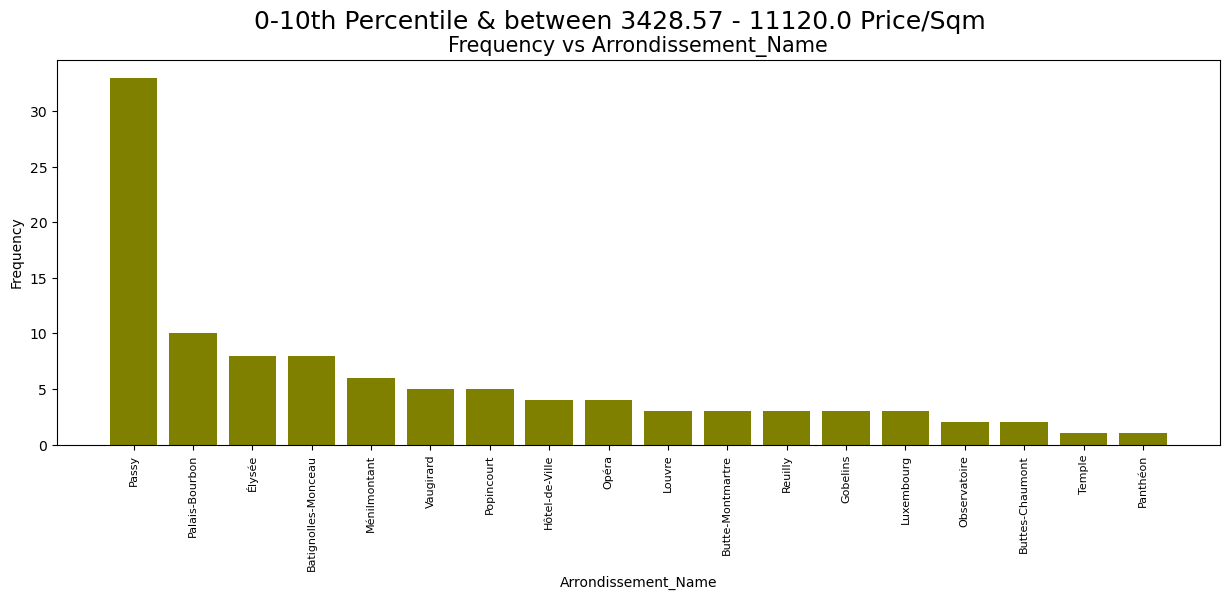

In [22]:

df_0_10th.sort_values('Percentile_Frequency (Price/sqm)', ascending=False, inplace=True)

# Extract price per sqm range for the title
pricepersqm_ranges_based_on_percentile_ranges = df_0_10th['Price/Sqm ranges based on Percentile ranges (in Euros)'].values[0]

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(df_0_10th['Arrondissement_Name'], df_0_10th['Percentile_Frequency (Price/sqm)'], color='olive')

plt.xlabel('Arrondissement_Name', size=10)
plt.ylabel('Frequency', size=10)
plt.suptitle(f'0-10th Percentile & between {pricepersqm_ranges_based_on_percentile_ranges} Price/Sqm', size=18)
plt.title('Frequency vs Arrondissement_Name', fontsize=15)
plt.xticks(rotation=90, size=8)

plt.show()


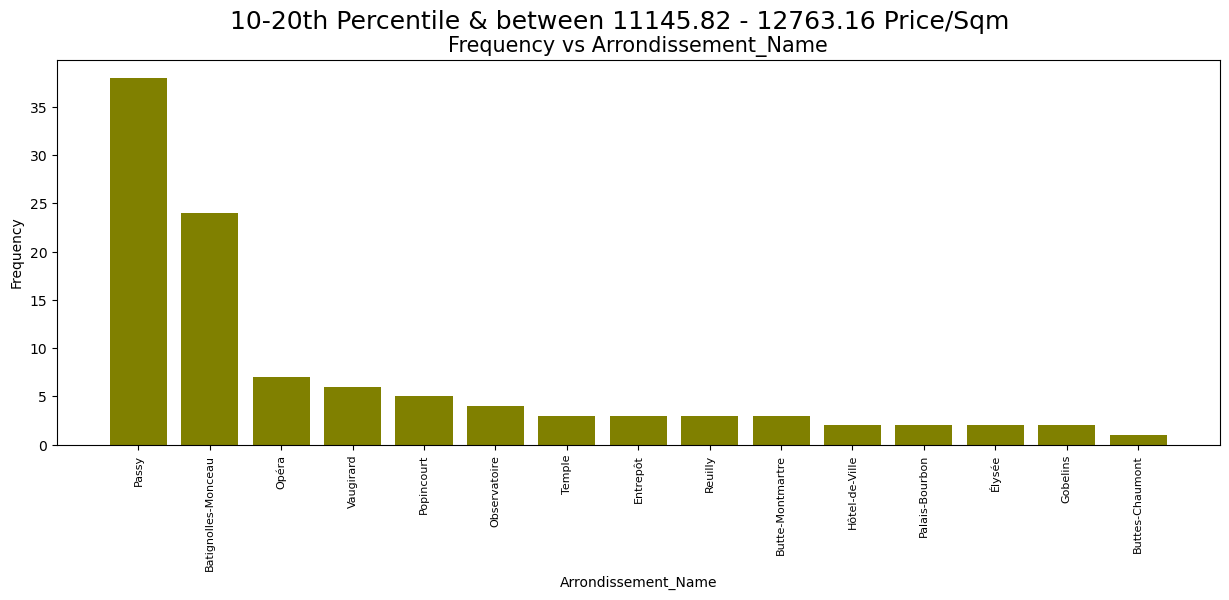

In [23]:

df_10_20th.sort_values('Percentile_Frequency (Price/sqm)', ascending=False, inplace=True)

# Extract price per sqm range for the title
pricepersqm_ranges_based_on_percentile_ranges = df_10_20th['Price/Sqm ranges based on Percentile ranges (in Euros)'].values[0]

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(df_10_20th['Arrondissement_Name'], df_10_20th['Percentile_Frequency (Price/sqm)'], color='olive')

plt.xlabel('Arrondissement_Name', size=10)
plt.ylabel('Frequency', size=10)
plt.suptitle(f'10-20th Percentile & between {pricepersqm_ranges_based_on_percentile_ranges} Price/Sqm', size=18)
plt.title('Frequency vs Arrondissement_Name', fontsize=15)
plt.xticks(rotation=90, size=8)

plt.show()


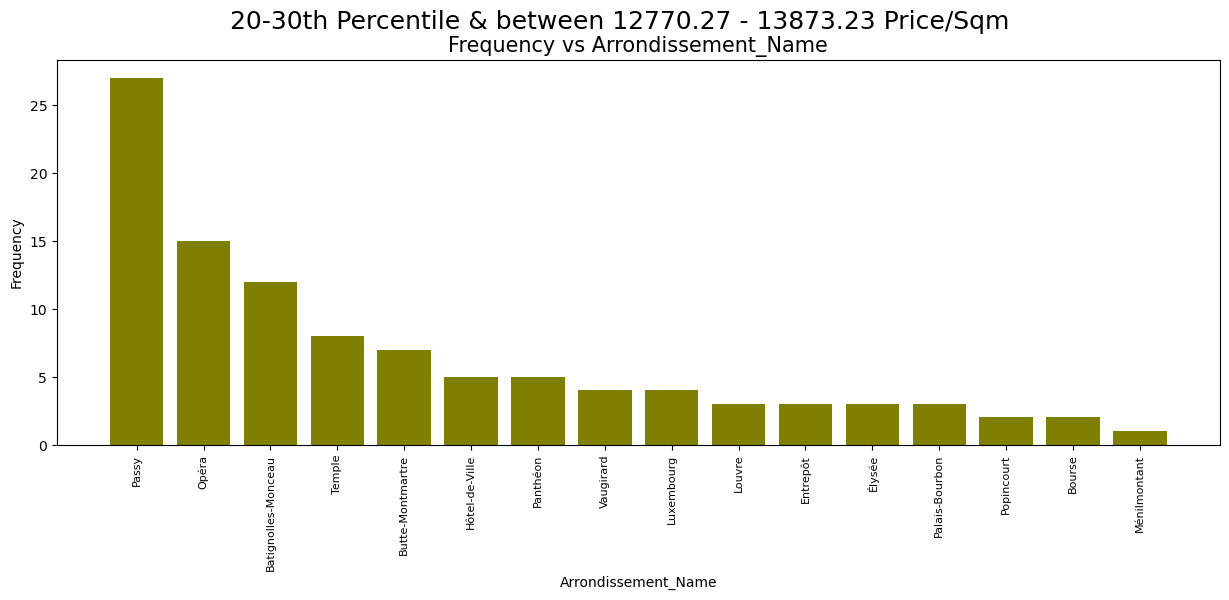

In [24]:

df_20_30th.sort_values('Percentile_Frequency (Price/sqm)', ascending=False, inplace=True)

# Extract price per sqm range for the title
pricepersqm_ranges_based_on_percentile_ranges = df_20_30th['Price/Sqm ranges based on Percentile ranges (in Euros)'].values[0]

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(df_20_30th['Arrondissement_Name'], df_20_30th['Percentile_Frequency (Price/sqm)'], color='olive')

plt.xlabel('Arrondissement_Name', size=10)
plt.ylabel('Frequency', size=10)
plt.suptitle(f'20-30th Percentile & between {pricepersqm_ranges_based_on_percentile_ranges} Price/Sqm', size=18)
plt.title('Frequency vs Arrondissement_Name', fontsize=15)
plt.xticks(rotation=90, size=8)

plt.show()

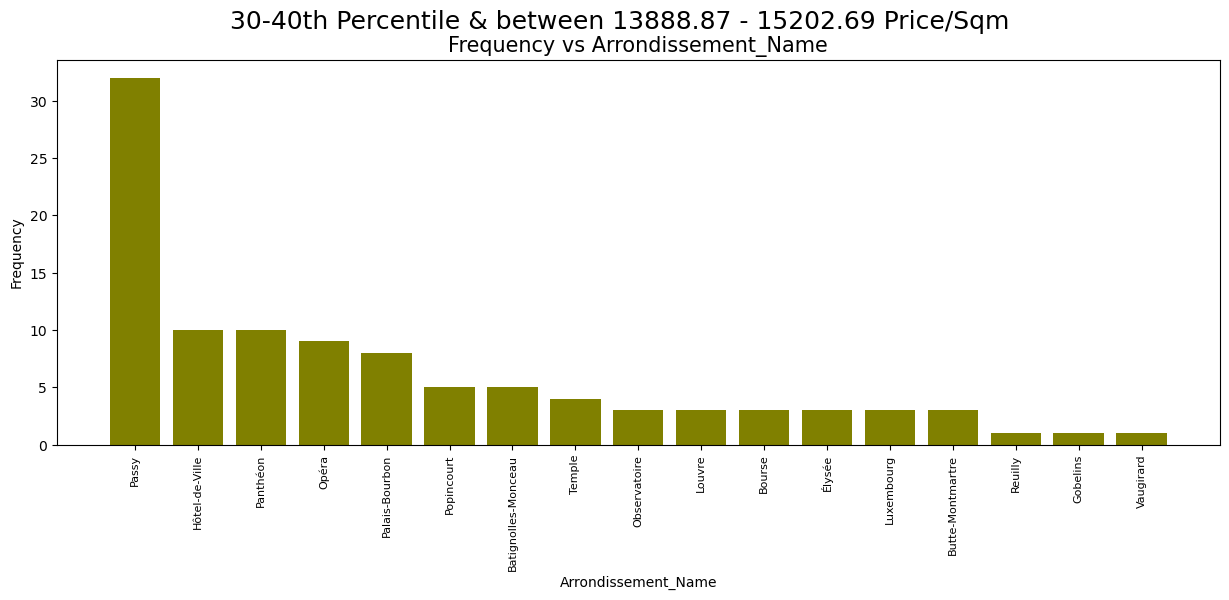

In [25]:

df_30_40th.sort_values('Percentile_Frequency (Price/sqm)', ascending=False, inplace=True)

# Extract price per sqm range for the title
pricepersqm_ranges_based_on_percentile_ranges = df_30_40th['Price/Sqm ranges based on Percentile ranges (in Euros)'].values[0]

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(df_30_40th['Arrondissement_Name'], df_30_40th['Percentile_Frequency (Price/sqm)'], color='olive')

plt.xlabel('Arrondissement_Name', size=10)
plt.ylabel('Frequency', size=10)
plt.suptitle(f'30-40th Percentile & between {pricepersqm_ranges_based_on_percentile_ranges} Price/Sqm', size=18)
plt.title('Frequency vs Arrondissement_Name', fontsize=15)
plt.xticks(rotation=90, size=8)

plt.show()

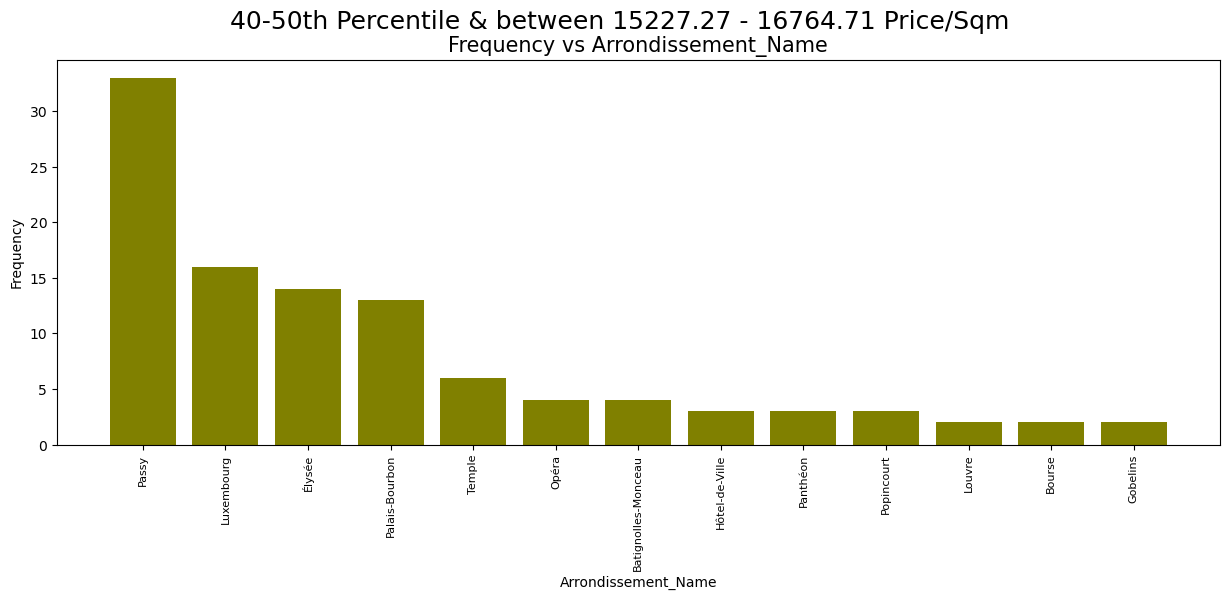

In [26]:

df_40_50th.sort_values('Percentile_Frequency (Price/sqm)', ascending=False, inplace=True)

# Extract price per sqm range for the title
pricepersqm_ranges_based_on_percentile_ranges = df_40_50th['Price/Sqm ranges based on Percentile ranges (in Euros)'].values[0]

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(df_40_50th['Arrondissement_Name'], df_40_50th['Percentile_Frequency (Price/sqm)'], color='olive')

plt.xlabel('Arrondissement_Name', size=10)
plt.ylabel('Frequency', size=10)
plt.suptitle(f'40-50th Percentile & between {pricepersqm_ranges_based_on_percentile_ranges} Price/Sqm', size=18)
plt.title('Frequency vs Arrondissement_Name', fontsize=15)
plt.xticks(rotation=90, size=8)

plt.show()

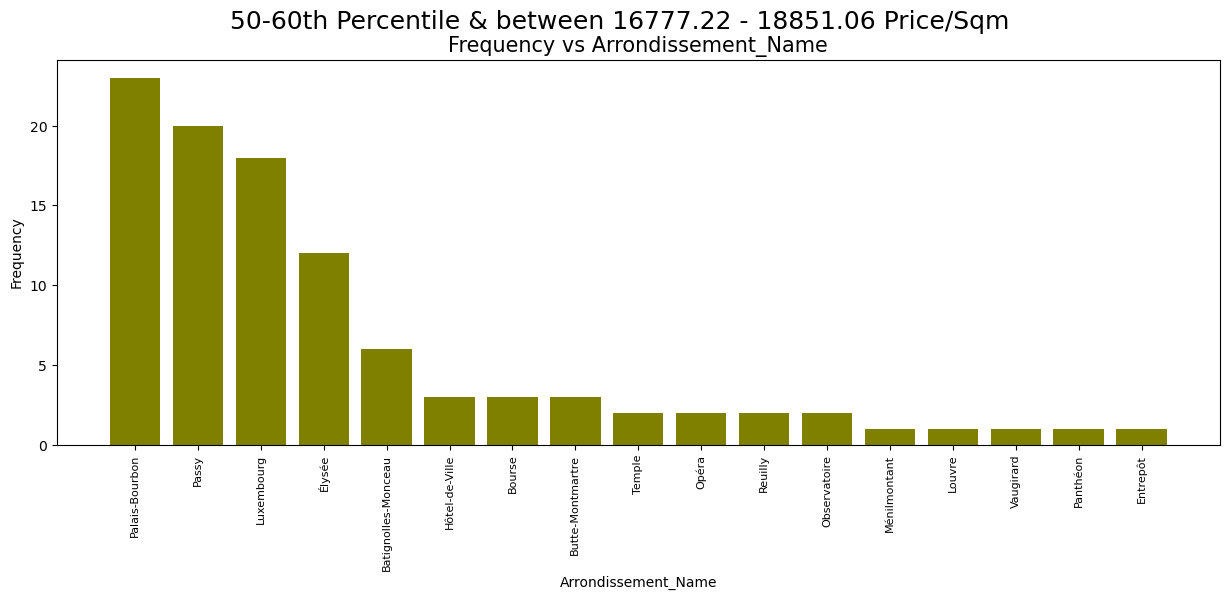

In [27]:
df_50_60th.sort_values('Percentile_Frequency (Price/sqm)', ascending=False, inplace=True)

# Extract price per sqm range for the title
pricepersqm_ranges_based_on_percentile_ranges = df_50_60th['Price/Sqm ranges based on Percentile ranges (in Euros)'].values[0]

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(df_50_60th['Arrondissement_Name'], df_50_60th['Percentile_Frequency (Price/sqm)'], color='olive')

plt.xlabel('Arrondissement_Name', size=10)
plt.ylabel('Frequency', size=10)
plt.suptitle(f'50-60th Percentile & between {pricepersqm_ranges_based_on_percentile_ranges} Price/Sqm', size=18)
plt.title('Frequency vs Arrondissement_Name', fontsize=15)
plt.xticks(rotation=90, size=8)

plt.show()

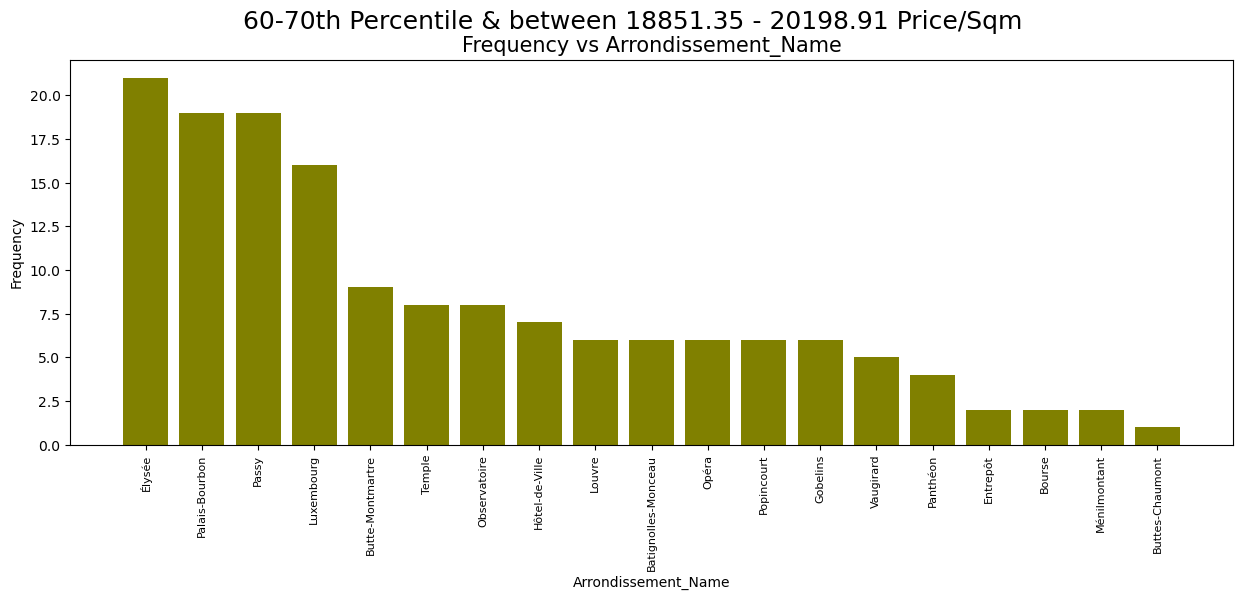

In [28]:
df_60_70th.sort_values('Percentile_Frequency (Price/sqm)', ascending=False, inplace=True)

# Extract price per sqm range for the title
pricepersqm_ranges_based_on_percentile_ranges = df_60_70th['Price/Sqm ranges based on Percentile ranges (in Euros)'].values[0]

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(df_60_70th['Arrondissement_Name'], df_60_70th['Percentile_Frequency (Price/sqm)'], color='olive')

plt.xlabel('Arrondissement_Name', size=10)
plt.ylabel('Frequency', size=10)
plt.suptitle(f'60-70th Percentile & between {pricepersqm_ranges_based_on_percentile_ranges} Price/Sqm', size=18)
plt.title('Frequency vs Arrondissement_Name', fontsize=15)
plt.xticks(rotation=90, size=8)

plt.show()

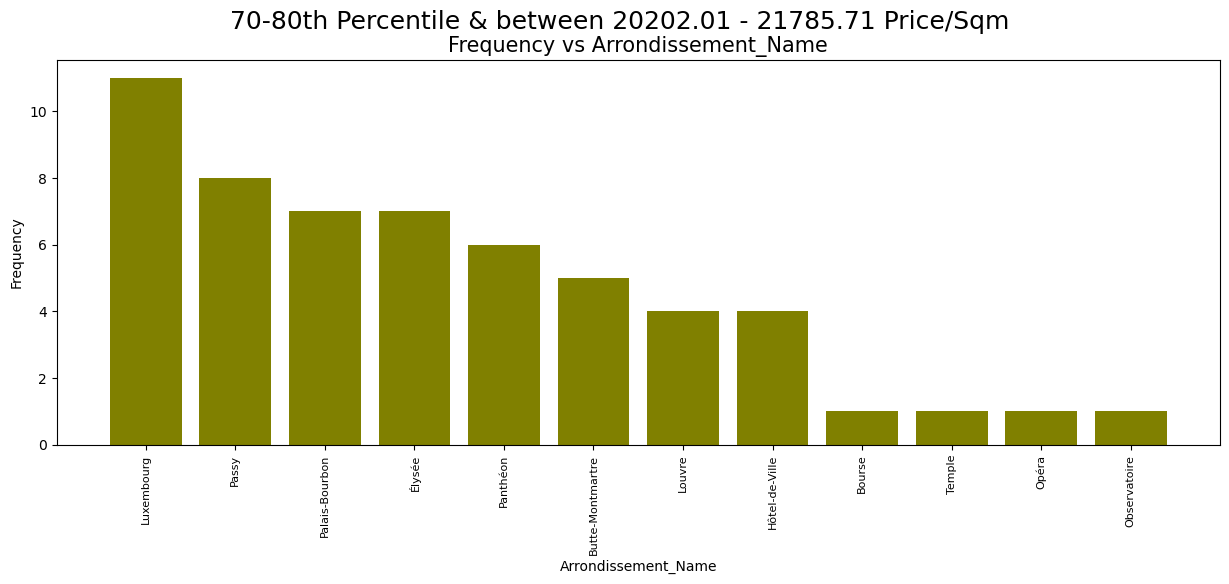

In [29]:
df_70_80th.sort_values('Percentile_Frequency (Price/sqm)', ascending=False, inplace=True)

# Extract price per sqm range for the title
pricepersqm_ranges_based_on_percentile_ranges = df_70_80th['Price/Sqm ranges based on Percentile ranges (in Euros)'].values[0]

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(df_70_80th['Arrondissement_Name'], df_70_80th['Percentile_Frequency (Price/sqm)'], color='olive')

plt.xlabel('Arrondissement_Name', size=10)
plt.ylabel('Frequency', size=10)
plt.suptitle(f'70-80th Percentile & between {pricepersqm_ranges_based_on_percentile_ranges} Price/Sqm', size=18)
plt.title('Frequency vs Arrondissement_Name', fontsize=15)
plt.xticks(rotation=90, size=8)

plt.show()

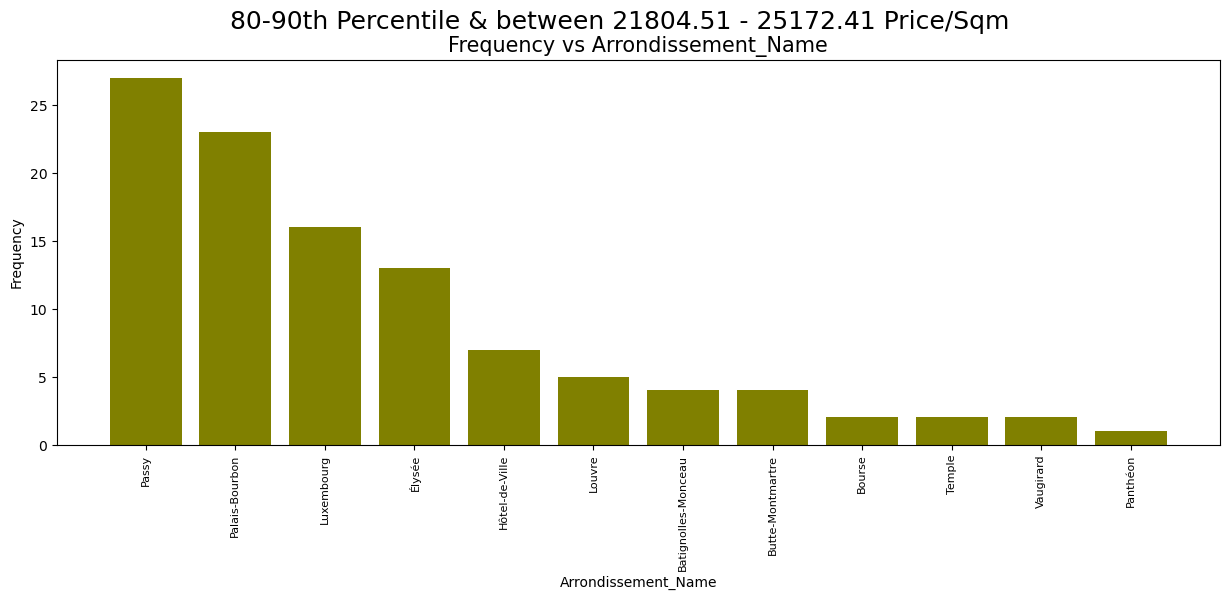

In [30]:
df_80_90th.sort_values('Percentile_Frequency (Price/sqm)', ascending=False, inplace=True)

# Extract price per sqm range for the title
pricepersqm_ranges_based_on_percentile_ranges = df_80_90th['Price/Sqm ranges based on Percentile ranges (in Euros)'].values[0]

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(df_80_90th['Arrondissement_Name'], df_80_90th['Percentile_Frequency (Price/sqm)'], color='olive')

plt.xlabel('Arrondissement_Name', size=10)
plt.ylabel('Frequency', size=10)
plt.suptitle(f'80-90th Percentile & between {pricepersqm_ranges_based_on_percentile_ranges} Price/Sqm', size=18)
plt.title('Frequency vs Arrondissement_Name', fontsize=15)
plt.xticks(rotation=90, size=8)

plt.show()

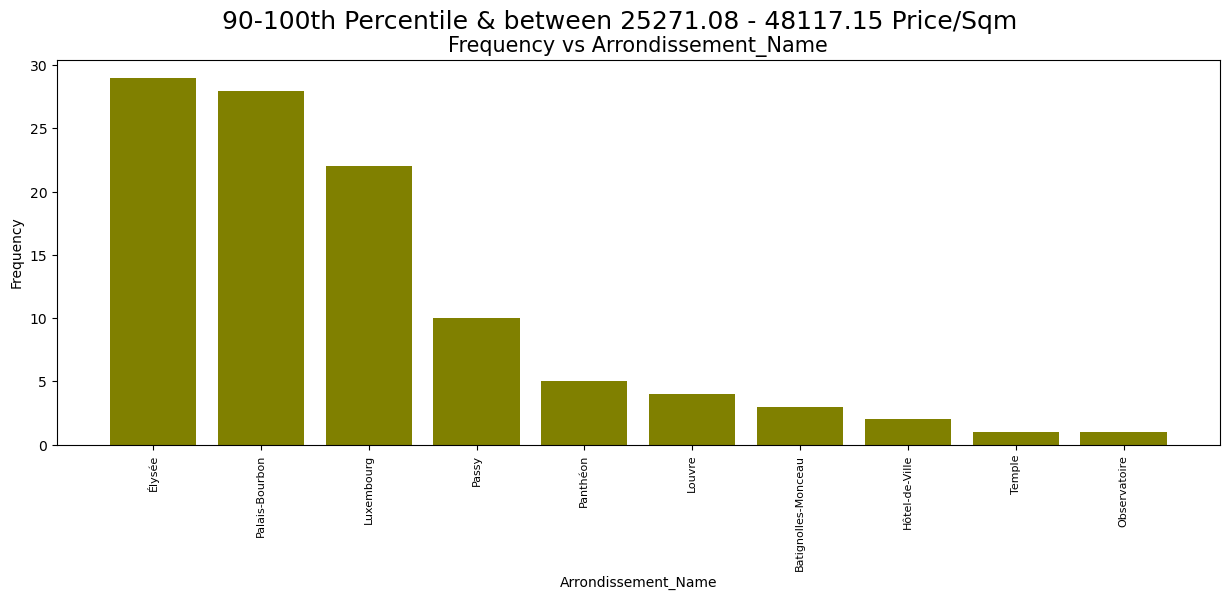

In [31]:
df_90_100th.sort_values('Percentile_Frequency (Price/sqm)', ascending=False, inplace=True)

# Extract price per sqm range for the title
pricepersqm_ranges_based_on_percentile_ranges = df_90_100th['Price/Sqm ranges based on Percentile ranges (in Euros)'].values[0]

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(df_90_100th['Arrondissement_Name'], df_90_100th['Percentile_Frequency (Price/sqm)'], color='olive')

plt.xlabel('Arrondissement_Name', size=10)
plt.ylabel('Frequency', size=10)
plt.suptitle(f'90-100th Percentile & between {pricepersqm_ranges_based_on_percentile_ranges} Price/Sqm', size=18)
plt.title('Frequency vs Arrondissement_Name', fontsize=15)
plt.xticks(rotation=90, size=8)

plt.show()

## Analysing Outliers (Potential Scams) using Confidence Interval

In [32]:
# Function to calculate confidence interval and margin of error
def calculate_confidence_interval(group, confidence=0.8):
    n = len(group)
    mean = np.mean(group)
    std_err = stats.sem(group)  # Standard error
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)  # Margin of error
    return mean, mean - h, mean + h, h

# Group by Arrondissement_Name and calculate confidence intervals and margin of error for Price/Sqm
confidence_intervals = df_sale.groupby('Arrondissement_Name')['Price/Sqm'].apply(calculate_confidence_interval)

# Convert the result to a DataFrame for better visualization
confidence_intervals_df = confidence_intervals.apply(pd.Series)
confidence_intervals_df.columns = ['Mean', 'Lower CI', 'Upper CI', 'Margin of Error']

# Function to check if a value falls within the confidence interval
def check_value_in_confidence_interval(location, value):
    # Remove leading/trailing whitespace and make case insensitive
    location = location.strip().capitalize()

    print(f"Checking for Arrondissement: '{location}'")

    if location in confidence_intervals_df.index:
        lower_ci, upper_ci, margin_of_error = confidence_intervals_df.loc[location, ['Lower CI', 'Upper CI', 'Margin of Error']]
        if lower_ci <= value <= upper_ci:
            return (f"The value {value} falls within the confidence interval of 80% for {location}. "
                    f"Margin of Error: {margin_of_error:.2f}")
        else:
            return (f"The value {value} does NOT fall within the confidence interval of 80% for {location}. "
                    f"Margin of Error: {margin_of_error:.2f}")
    else:
        return f"The location '{location}' is not found in the dataset."

# Example usage
location = 'Passy'
value = 11000
result = check_value_in_confidence_interval(location, value)
print(result)


Checking for Arrondissement: 'Passy'
The value 11000 does NOT fall within the confidence interval of 80% for Passy. Margin of Error: 416.82


In [33]:
df_sale["Arrondissement_Name"].value_counts()

Arrondissement_Name
Passy                  257
Palais-Bourbon         136
Élysée                 112
Luxembourg             109
Batignolles-Monceau     72
Opéra                   48
Hôtel-de-Ville          47
Butte-Montmartre        37
Panthéon                36
Temple                  36
Louvre                  31
Popincourt              26
Vaugirard               24
Observatoire            21
Bourse                  15
Gobelins                14
Ménilmontant            10
Entrepôt                 9
Reuilly                  9
Buttes-Chaumont          4
Name: count, dtype: int64